<a href="https://colab.research.google.com/github/pvidya11/Deep_Learning/blob/main/Projects/10_Time_Series_Forecasting(LSTM)/Develop_LSTM_For_Univarient_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>Develop_LSTM_For_Univarient_Time_Series_Forecasting</b></h1>

In [52]:
# Univarient LSTM example
import numpy as np
from keras.layers import LSTM, Dense, Flatten
from keras.models import Sequential

In [53]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [54]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [55]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [56]:
X.shape

(6, 3)

In [59]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(x, y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 32342.4219
Epoch 2/300
1/1 [==============================] - 0s 5ms/step - loss: 32177.3340
Epoch 3/300
1/1 [==============================] - 0s 7ms/step - loss: 32000.1309
Epoch 4/300
1/1 [==============================] - 0s 7ms/step - loss: 31813.4668
Epoch 5/300
1/1 [==============================] - 0s 5ms/step - loss: 31619.8105
Epoch 6/300
1/1 [==============================] - 0s 5ms/step - loss: 31420.2109
Epoch 7/300
1/1 [==============================] - 0s 5ms/step - loss: 31218.2422
Epoch 8/300
1/1 [==============================] - 0s 5ms/step - loss: 31015.0781
Epoch 9/300
1/1 [==============================] - 0s 7ms/step - loss: 30811.3125
Epoch 10/300
1/1 [==============================] - 0s 12ms/step - loss: 30605.6328
Epoch 11/300
1/1 [==============================] - 0s 10ms/step - loss: 30397.6094
Epoch 12/300
1/1 [==============================] - 0s 11ms/step - loss: 30194.8301
Epoch 13/30

<h><b>Predicting For the next 10 data</b></h>

In [61]:
# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[224.40138]
1 day input [196.         210.         224.40138245]
1 day output [[235.23999]]
2 day input [210.         224.40138245 235.23999023]
2 day output [[249.2887]]
3 day input [224.40138 235.23999 249.2887 ]
3 day output [[263.45798]]
4 day input [235.23999 249.2887  263.45798]
4 day output [[276.0648]]
5 day input [249.2887  263.45798 276.0648 ]
5 day output [[290.81277]]
6 day input [263.45798 276.0648  290.81277]
6 day output [[305.66977]]
7 day input [276.0648  290.81277 305.66977]
7 day output [[320.1073]]
8 day input [290.81277 305.66977 320.1073 ]
8 day output [[336.06696]]
9 day input [305.66977 320.1073  336.06696]
9 day output [[352.2722]]
[224.40138, 235.23999, 249.2887, 263.45798, 276.0648, 290.81277, 305.66977, 320.1073, 336.06696, 352.2722]


In [62]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [63]:
len(timeseries_data)

9

In [65]:
lst_output

[224.40138,
 235.23999,
 249.2887,
 263.45798,
 276.0648,
 290.81277,
 305.66977,
 320.1073,
 336.06696,
 352.2722]

<h><b>Visualizaing The Output</b></h>

In [66]:
import matplotlib.pyplot as plt

In [67]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

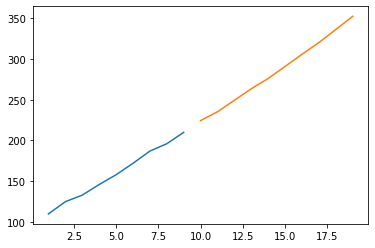

In [69]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)